In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

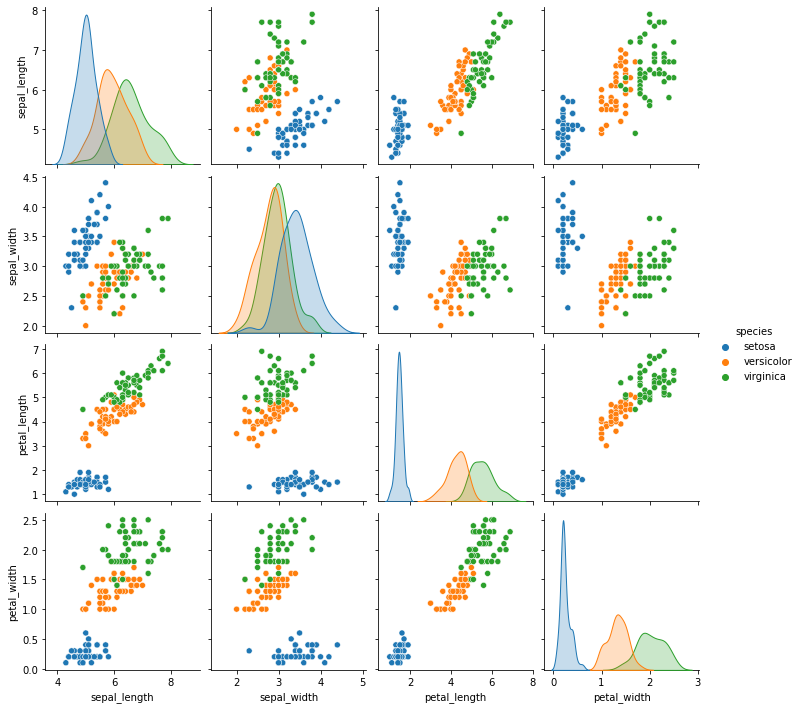

In [5]:
sns.pairplot(iris, hue='species')     # hue is the class

In [6]:
#  let's consider X is variable of interest

X = iris.petal_length

In [7]:
X.shape            # shape of x is 150 ----->   150 rows ----> length= 150

(150,)

In [8]:
# target lables

y = iris.species

In [9]:
y.shape

(150,)

In [14]:
# see the target labels
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
y[y == 'setosa'] = '0'
y[y == 'versicolor'] = '1'
y[y == 'virginica'] = '2'

<ipython-input-15-c91b1931f037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'setosa'] = '0'
<ipython-input-15-c91b1931f037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'versicolor'] = '1'
<ipython-input-15-c91b1931f037>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'virginica'] = '2'


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: object

In [17]:
y.unique()

array(['0', '1', '2'], dtype=object)

X is random variables, and y has 3 categories 0,1,2

Goal is to build y given x i.e.  y|x , when x is given what is the probability of y?

P(y|x) , this is probability mass function bcz y is discrete random variable. 
x is continuous. we are building a model for y, and it's discrete, so probability model will be discrete model.

P(y|x) = fx(x|y) Py(y)
        __________________     ---------  base rule
              fx(x)
              
              
              
P(y=0 | x=1.9) = fx(x=1.9 | y=0) Py(y=0)
               _____________________________
                      fx(x=1.9)
                      
                      
P(y=1 | x=1.9) =    ........
P(y=2 | x=1.9) =    ........


We are not interested in computing the exact probabilities here.
All we are going to compute is the comparisons of these three. And comparison will stay same even if we do not include these denominator factor.
By removing the denominator factor, the result will no longer be a probability value. But the comparison stays same.
 
We are interested to compute fx(x|y), called "class conditional density" and other probability model that we want to compute is the Py(y) called "Prior distribution".

To compute the Prior distribution is very easy, What is probability that the next value that we are going to looking for belongs to class 1, it belongs to class 2, it belongs to class 0. That can be model by seeing the frequencies in the given data, what fraction is belongs to class 1, what fraction is belongs to class 2, what fraction is belongs to class 0. 

petal length looks like Gaussian, but don't know mue value

fx(x|y=0) is normal Mue1, sigma1
fx(x|y=1) is normal Mue2, sigma2
fx(x|y=2) is normal Mue3, sigma3

we need to find these parameters.


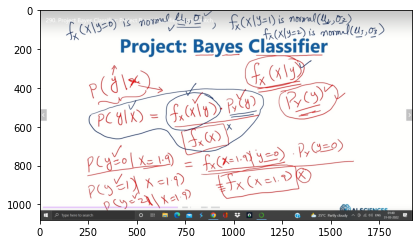

In [20]:
# Basic logic and formulae

import matplotlib.pyplot as plt

read_image = plt.imread('C:\\MyModules_ZeroToHeroCourse\\image_read\\naiveBayesProjectLogic.png') 
plt.imshow(read_image, origin='lower', extent=[-4, 4, -1, 1], aspect=4)

plt.imshow(read_image)

In [40]:
import numpy as np
idx = np.random.permutation(np.arange(y.size))    # set random permutation
nTrain = 120    # training size/ percentage
nTest = idx.size-nTrain
XTrain = X[idx[:nTrain]]
ytrain = y[idx[:nTrain]]
Xtest = X[idx[nTrain:]]
ytest = y[idx[nTrain:]]

In [41]:
ytrain.size

120

In [42]:
ytest.size

30

In [43]:
# probability of y - py
Py = np.zeros(3)      # bcz we have 3 classes
Py[0] = (ytrain=='0').sum()/ytrain.size
Py[1] = (ytrain=='1').sum()/ytrain.size
Py[2] = (ytrain=='2').sum()/ytrain.size

In [44]:
Py[0]      # py for class 0

0.325

In [45]:
Py[1]      # py for class 1

0.375

In [46]:
Py[2]      # py for class 2

0.3

In [48]:
# OR just write Py,   Py act as a prior distribution
Py

array([0.325, 0.375, 0.3  ])

In [49]:
# now compute fx given y
# initialization with 0, bcz normal distribution
# fx_given_y = [(0,0),(0,0),(0,0)]     # List of tuple, first value-mue, second value-sigma for all class0, class1, class3
#tuple can not use, bcz it's immuatable, use list inside list
fx_given_y = [[0,0], [0,0], [0,0]]  

In [50]:
# find out samples/ data

X_0 = XTrain[ytrain=='0']       # find where the ytrain=0, this is the data that belongs to class 0
X_1 = XTrain[ytrain=='1']       # class 1 data
X_2 = XTrain[ytrain=='2']       # class 2 data

mu_0 = X_0.mean()      # bcz the large numbers
mu_1 = X_1.mean()
mu_2 = X_2.mean()

sgma_0 = X_0.std()     # compute standard deviation
sgma_1 = X_1.std()
sgma_2 = X_2.std()

fx_given_y[0][0] = mu_0
fx_given_y[0][1] = sgma_0

fx_given_y[1][0] = mu_1
fx_given_y[1][1] = sgma_1

fx_given_y[2][0] = mu_2
fx_given_y[2][1] = sgma_2

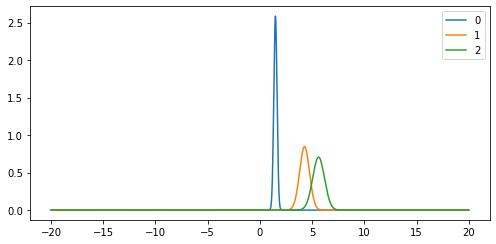

In [51]:
x = np.linspace(-20,20,10000)
for i in range(3):
    mu = fx_given_y[i][0]
    sgma = fx_given_y[i][1]
    fx = np.exp((-(x-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)
    plt.plot(x, fx, label=str(i))
plt.legend()

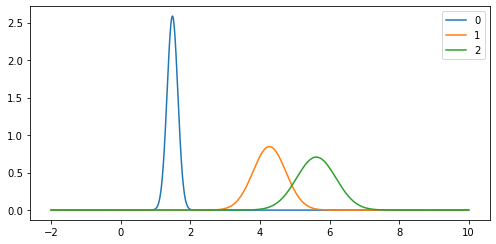

In [52]:
x = np.linspace(-2,10,10000)
for i in range(3):
    mu = fx_given_y[i][0]
    sgma = fx_given_y[i][1]
    fx = np.exp((-(x-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)
    plt.plot(x, fx, label=str(i))
plt.legend()

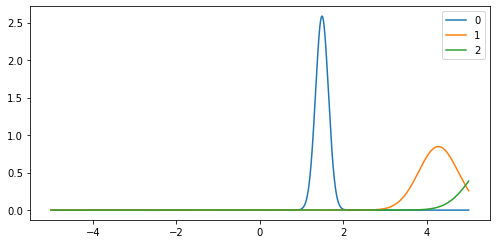

In [53]:
x = np.linspace(-5,5,10000)
for i in range(3):
    mu = fx_given_y[i][0]
    sgma = fx_given_y[i][1]
    fx = np.exp((-(x-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)     # Gaussian formula
    plt.plot(x, fx, label=str(i))
plt.legend()

In [54]:
xt = Xtest[0]

In [55]:
xt

1.4

In [56]:
type(Xtest)

pandas.core.series.Series

In [57]:
#convert it as np array
Xtest = np.asarray(Xtest)

In [58]:
type(Xtest)

numpy.ndarray

In [59]:
XT = Xtest[0]
print(XT)

5.6


In [60]:
i = 0
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 0 given x
Py_0_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

In [61]:
Py_0_given_x        # this value is very close to zero, but not exact probability value, bcz we have not considered denominator value, and in probability model denominator is required

0.7166281481308588

In [63]:
i = 1
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 1 given x
Py_1_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

In [64]:
i = 2
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 2 given x
Py_2_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

In [65]:
Py_1_given_x 

2.2280248426237697e-09

In [66]:
Py_2_given_x 

1.6259710967956176e-13

In [67]:
print(Py_0_given_x , Py_1_given_x , Py_2_given_x )

0.7166281481308588 2.2280248426237697e-09 1.6259710967956176e-13


NOTE : our classifier says the class 0 is winner, bcz it has maximum value compare to others

In [68]:
# True value of y
type(ytest)

pandas.core.series.Series

In [69]:
# first convert it into numpy
ytest = np.asarray(ytest)

In [70]:
ytest[0]

'2'

NOTE:   The true value of y is 2, and we got class 0 as a result. So it doesn't work well for this example. 

# Test case 2:

In [72]:
# Test for another vlaue:

xt = Xtest[10]
print(xt)

1.1


In [73]:
i = 0
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 0 given x
Py_0_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

i = 1
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 1 given x
Py_1_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

i = 2
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 2 given x
Py_2_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

In [74]:
print(Py_0_given_x , Py_1_given_x , Py_2_given_x )

0.035953226587602576 3.7147733420478135e-11 2.641964735579629e-15


In [75]:
ytest[10]

'0'

NOTE:  our classifier says that class 0 , also the true label says that class 0. so we are correct

# Test case 3

In [77]:
# check for different data point

xt = Xtest[20]
print(xt)

1.2


In [78]:
i = 0
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 0 given x
Py_0_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

i = 1
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 1 given x
Py_1_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

i = 2
mu = fx_given_y[i][0]
sgma =  fx_given_y[i][1]
# probability of y is equals to 2 given x
Py_2_given_x = Py[0] * np.exp((-(xt-mu)**2)/(2*(sgma**2)))/ ((2*np.pi*sgma**2)**0.5)

In [79]:
print(Py_0_given_x , Py_1_given_x , Py_2_given_x )

0.14844429227086403 1.5212403679922448e-10 1.0763945964767666e-14


In [80]:
ytest[20]

'0'

NOTE:  again we got right result, our classifier and true label found the same class i.e class 1. Class 1 has the max number.
    
    class 0 has min number bcz -51 is there, class 1 has 0.29...., ans class 2 has 0.01..... 

In [82]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
